## Independent component analysis (ICA)
ICA can be used for artefact detection, since it identifies seperate components of the signal that have been combined during recording. That means that we can actually separate noise compoenents, such as eye blinks, from the rest of the signal, and thereby exclude them.

loading in libraries and data

In [50]:
# importing modules
import os
import numpy as np
import mne

In [52]:
# trying to load the local data
data = mne.io.read_raw_brainvision("Group6_own.vhdr", eog=('EOG1', 'EOG2'), misc='auto', scale=1.0, preload=False, verbose=None)
data.info['bads'] = []

Extracting parameters from Group6_own.vhdr...
Setting channel info structure...


Opening raw-browser...


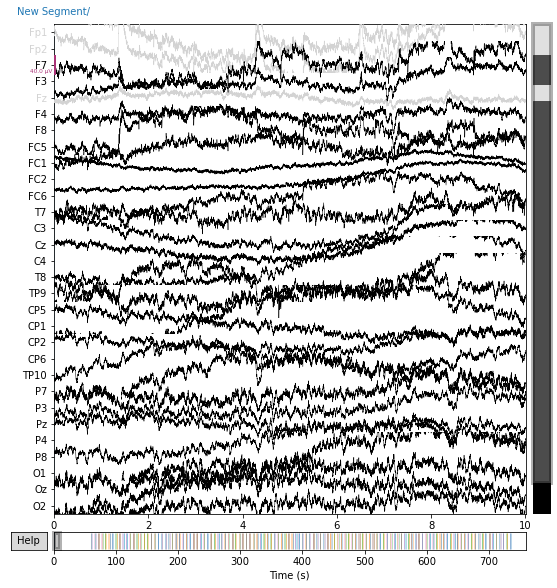

Opening raw-browser...


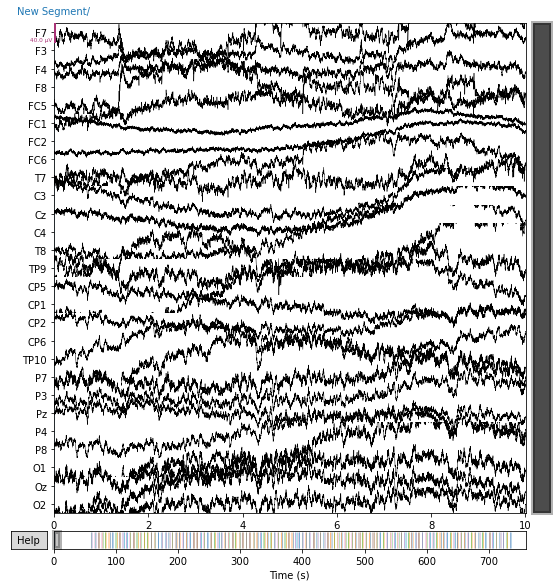

In [53]:
# input the name of the bad EEG channel here, e.g. ['EEG 002']

data.info['bads'] = ['Fz', 'Fp1', 'Fp2']
data.plot(n_channels=30);


### excluding the bad channels from the data:
data.pick_types(meg=False, eeg=True, stim=True, exclude='bads')
data.plot(n_channels=30);

#### high pass filtering before ICA 


In [57]:
# high-pass filtering the data at 0.1 Hz and subsequently low-pass filtering at 40 Hz
fil_data = data.filter(0.1, None)
fil_data = data.filter(None, 40)

# plotting the filtered data for inspection
fil_data.plot(n_channels=30);

RuntimeError: By default, MNE does not load data into main memory to conserve resources. inst.filter requires raw data to be loaded. Use preload=True (or string) in the constructor or raw.load_data().

In [ ]:
#### DOING THE ICA
# set up and fit the ica with 800 iterations with a random seed at 97
# n_components=0.95 ensures that the number of components selected explain at least 95% of the variance in the data
ica = mne.preprocessing.ICA(n_components=0.95, random_state=97, max_iter=800)
ica.fit(raw_data)

In [ ]:
# plotting the ica components
ica.plot_components();

In [ ]:
# plotting the time series of the ica
ica.plot_sources(data_fil, show_scrollbars=False);

From visual inspection of the topographic maps and the time series plots of the components, we can see that the first component seems to capture noise. Consequently, we can remove it and thereby extract these artefacts from the data.
^^ this is for the face word ... we inspect our own data and see if that is the case ...

In [ ]:
# the first component is excluded based on visual inspection
ica.exclude = [0]
ica.plot_properties(data_fil, picks=ica.exclude);

nooow it is time to put iCA on the data:

In [ ]:
# applying the ica to the data
data_ica = ica.apply(data_fil)

In [ ]:
# plotting the data after filtering and ica
data_ica.plot();

Now try to run 
- artefact-detection
- epoching
- downsampling
- the single-trial plots
- the evokeds plots

(i.e. exactly like you just did in the above)

Now compare your results with and without ICA - can you tell any differences between the two, just qualitatively speaking?